<h1>C. Data Exploration </h1>

<p>Display word frequency in various forms as shown below</p>

1. [Word Frequency Distribution](#Section3)
    
    1.1 General
    
    1.2 Sentiment Version
    
2. [WordCloud](#Section4)

    2.1 General
    
    2.2 Sentiment Version
    
3. [Stacked Bar Chart](#Section5)

Source (Modified from Original)

https://github.com/ariessa/Twitter-Sentiment-Analysis-Using-VADER/blob/master/Twitter_2.ipynb

In [1]:
#Import libraries
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt

from collections import Counter

In [4]:
# Load csv file containing tweets dataset (w/ sentiments)
#this dataset is a combination of all keywords in the location (+removed duplicates)
#Example: TextBlob - All Keywords_Malaysia (Location) - Snscrape
tweets_df = pd.read_csv(r"C:\Users\LENOVO\Documents\Degree Life\FYP Journey\Dataset\Sentiment Analysis\VADER\[FINAL UPDATED] VADER_All Keywords (Whole Malaysia) - Snscrape.csv")
display(tweets_df)

# Create the title 
title = "VADER - Food Insecurity Keywords (Malaysia) [All]"

print(title)
len(tweets_df)

,Datetime,Username,Cleaned_Tweets,Location,Sentiment Score,Sentiment
0,27/1/2023 14:32,Don Dale,buying forget review first guy feel want comme...,NaN,0.6703,Positive
1,27/1/2023 19:04,Iliani,food security research going explode issue end...,NaN,0.5859,Positive
2,29/1/2023 8:28,Naim Zaini,context slaughtered food muslim consideration ...,NaN,0.8658,Positive
3,29/1/2023 13:29,??,raise food price wet good expensive sorry guy,NaN,0.3818,Positive
4,30/1/2023 21:52,Alinosourawr,che restaurant sek send food x order food drin...,NaN,-0.8934,Negative
...,...,...,...,...,...,...
21832,2023-03-30 23:45:13+00:00,Charrlygirl,worried prosecution team family also worried f...,MA,-0.8360,Negative
21833,2023-03-30 23:49:23+00:00,angel19971102,love much clark must always worried bruce drea...,Taiwan,0.6939,Positive
21834,2023-03-30 23:55:01+00:00,firdyfire,industry player worried energy commission chie...,Malaysia,-0.0258,Negative
21835,2023-03-30 23:55:16+00:00,AhmadMuhyie,ah really weak faith fasting without real exam...,Jember,0.6222,Positive


VADER - Food Insecurity Keywords (Malaysia) [All]


21837

In [5]:
# count the number of positive and negative sentiments
positive_count = tweets_df['Sentiment'].value_counts().get('Positive', 0)
negative_count = tweets_df['Sentiment'].value_counts().get('Negative', 0)

# calculate the percentage of positive and negative sentiments
total_count = positive_count + negative_count

if total_count == 0:
    positive_percentage = 0
    negative_percentage = 0
else:
    positive_percentage = (positive_count / total_count) * 100
    negative_percentage = (negative_count / total_count) * 100

# create a dataframe to display the results
data = {'Sentiment': ['Positive', 'Negative'], 'Count': [positive_count, negative_count], 
        'Percentage': [positive_percentage, negative_percentage]}
sentiment_df = pd.DataFrame(data)
sentiment_df['Percentage'] = sentiment_df['Percentage'].apply(lambda x: '{:.2f}%'.format(x)) # format percentage column

# display total sentiment count dataframe
display(sentiment_df)

,Sentiment,Count,Percentage
0,Positive,14433,66.09%
1,Negative,7404,33.91%


## 1. Word Frequency Distribution<a name="Section3"></a>

<h2>1.1  General Version</h2>

In [15]:
import contractions

# Replace contractions with their expanded forms
def fix_contractions(text):
    if isinstance(text, str):
        return contractions.fix(text)
    else:
        return text

tweet_df['Cleaned_Tweets'] = tweet_df['Cleaned_Tweets'].apply(fix_contractions)
display(tweet_df)

,Datetime,Username,Cleaned_Tweets,Location,Polarity,Subjectivity,Sentiment
0,27/1/2023 14:32,Don Dale,buying forget review first guy feel like want ...,NaN,-0.250000,0.677778,Negative
1,27/1/2023 19:04,Iliani,food security research going explode issue end...,NaN,-0.181818,0.577273,Negative
2,29/1/2023 8:28,Naim Zaini,context slaughtered food muslim consideration ...,NaN,0.034722,0.685802,Positive
3,29/1/2023 13:29,??,raise food price wet good expensive sorry guy,NaN,-0.100000,0.675000,Negative
4,30/1/2023 21:52,Alinosourawr,che restaurant sek send food x order food drin...,NaN,-0.433333,0.633333,Negative
...,...,...,...,...,...,...,...
28008,2023-03-30 23:45:13+00:00,Charrlygirl,worried prosecution team family also worried f...,MA,0.000000,0.000000,Negative
28009,2023-03-30 23:49:23+00:00,angel19971102,love much clark must always worried bruce drea...,Taiwan,0.400000,0.466667,Positive
28010,2023-03-30 23:55:01+00:00,firdyfire,industry player worried energy commission chie...,Malaysia,0.000000,0.000000,Negative
28011,2023-03-30 23:55:16+00:00,AhmadMuhyie,ah really weak faith fasting without real exam...,Jember,0.239583,0.589583,Positive


In [ ]:
#Backup Code
import contractions

# Replace contractions with their expanded forms
tweet_df['Cleaned_Tweets'] = tweet_df['Cleaned_Tweets'].apply(lambda x: contractions.fix(x))
display(tweet_df)

In [16]:
#Remove remaining tweets after applying contractions to the tweets dataset
from nltk.corpus import stopwords

# Create a list of custom stopwords.
custom_stopwords = ["still", "amp", "like", "go", "even"]

# Add the custom stopwords to the stopwords set.
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.update(custom_stopwords)
# Remove stopwords from the cleaned tweets
#tweet_df['Cleaned_Tweets'] = tweet_df['Cleaned_Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
tweet_df['Cleaned_Tweets'] = tweet_df['Cleaned_Tweets'].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words]))

display(tweet_df)

,Datetime,Username,Cleaned_Tweets,Location,Polarity,Subjectivity,Sentiment
0,27/1/2023 14:32,Don Dale,buying forget review first guy feel want comme...,NaN,-0.250000,0.677778,Negative
1,27/1/2023 19:04,Iliani,food security research going explode issue end...,NaN,-0.181818,0.577273,Negative
2,29/1/2023 8:28,Naim Zaini,context slaughtered food muslim consideration ...,NaN,0.034722,0.685802,Positive
3,29/1/2023 13:29,??,raise food price wet good expensive sorry guy,NaN,-0.100000,0.675000,Negative
4,30/1/2023 21:52,Alinosourawr,che restaurant sek send food x order food drin...,NaN,-0.433333,0.633333,Negative
...,...,...,...,...,...,...,...
28008,2023-03-30 23:45:13+00:00,Charrlygirl,worried prosecution team family also worried f...,MA,0.000000,0.000000,Negative
28009,2023-03-30 23:49:23+00:00,angel19971102,love much clark must always worried bruce drea...,Taiwan,0.400000,0.466667,Positive
28010,2023-03-30 23:55:01+00:00,firdyfire,industry player worried energy commission chie...,Malaysia,0.000000,0.000000,Negative
28011,2023-03-30 23:55:16+00:00,AhmadMuhyie,ah really weak faith fasting without real exam...,Jember,0.239583,0.589583,Positive


In [17]:
#Remove duplicate tweets in the dataset
cleaned_df = tweet_df.drop_duplicates(subset='Cleaned_Tweets')
display(cleaned_df)

print('Number of rows left:', len(cleaned_df))

,Datetime,Username,Cleaned_Tweets,Location,Polarity,Subjectivity,Sentiment
0,27/1/2023 14:32,Don Dale,buying forget review first guy feel want comme...,NaN,-0.250000,0.677778,Negative
1,27/1/2023 19:04,Iliani,food security research going explode issue end...,NaN,-0.181818,0.577273,Negative
2,29/1/2023 8:28,Naim Zaini,context slaughtered food muslim consideration ...,NaN,0.034722,0.685802,Positive
3,29/1/2023 13:29,??,raise food price wet good expensive sorry guy,NaN,-0.100000,0.675000,Negative
4,30/1/2023 21:52,Alinosourawr,che restaurant sek send food x order food drin...,NaN,-0.433333,0.633333,Negative
...,...,...,...,...,...,...,...
28008,2023-03-30 23:45:13+00:00,Charrlygirl,worried prosecution team family also worried f...,MA,0.000000,0.000000,Negative
28009,2023-03-30 23:49:23+00:00,angel19971102,love much clark must always worried bruce drea...,Taiwan,0.400000,0.466667,Positive
28010,2023-03-30 23:55:01+00:00,firdyfire,industry player worried energy commission chie...,Malaysia,0.000000,0.000000,Negative
28011,2023-03-30 23:55:16+00:00,AhmadMuhyie,ah really weak faith fasting without real exam...,Jember,0.239583,0.589583,Positive


Number of rows left: 21838


In [18]:
#save the updated cleaned sentiment dataset
cleaned_df.to_csv('[FINAL UPDATED] TextBlob_All Keywords (Whole Malaysia) - Snscrape.csv', index=False)

In [ ]:
# count the number of positive and negative sentiments (After Advanced Filtering)
positive_count = cleaned_df['Sentiment'].value_counts().get('Positive', 0)
negative_count = cleaned_df['Sentiment'].value_counts().get('Negative', 0)

# calculate the percentage of positive and negative sentiments
total_count = positive_count + negative_count

if total_count == 0:
    positive_percentage = 0
    negative_percentage = 0
else:
    positive_percentage = (positive_count / total_count) * 100
    negative_percentage = (negative_count / total_count) * 100

# create a dataframe to display the results
data = {'Sentiment': ['Positive', 'Negative'], 'Count': [positive_count, negative_count], 
        'Percentage': [positive_percentage, negative_percentage]}
sentiment_df = pd.DataFrame(data)
sentiment_df['Percentage'] = sentiment_df['Percentage'].apply(lambda x: '{:.2f}%'.format(x)) # format percentage column

# display total sentiment count dataframe
display(sentiment_df)

In [7]:
#Remove remaining tweets after applying contractions to the tweets dataset
from nltk.corpus import stopwords

# Add the custom stopwords to the stopwords set.
stop_words = set(nltk.corpus.stopwords.words('english'))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28144\3891533828.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


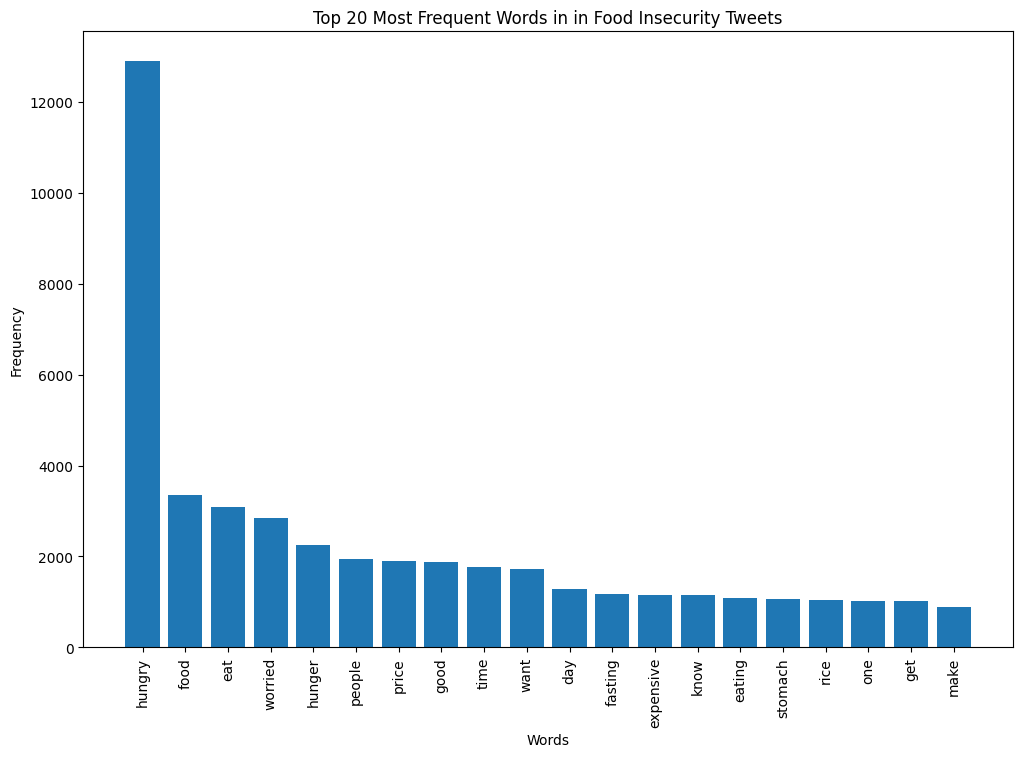

In [8]:
from collections import Counter

# Create a list of all tokens from the Cleaned_Tweets column
tokens = []
for tweet in tweets_df['Cleaned_Tweets']:
    tokens.extend(tweet.split())

# Remove stopwords from the tokens list
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.lower() not in stop_words]

# Create a frequency distribution of the remaining words
word_freq = Counter(tokens)

# Create a bar chart of the top 20 most frequent words
top_words = word_freq.most_common(20)
labels, values = zip(*top_words)
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(labels, values)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Top 20 Most Frequent Words in in Food Insecurity Tweets')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.show()

In [9]:
from nltk.probability import FreqDist

# Create a frequency distribution of the remaining words
word_freq = Counter([word for tweet in tweets_df['Tokenized_Tweets'] for word in tweet])

# Convert the frequency distribution into a pandas dataframe
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['Frequency'])

# Sort the dataframe by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Print the top 10 most frequent words
print(word_freq_df.head(10))

KeyError: 'Tokenized_Tweets'

In [11]:
# Plot the top 20 most frequent words
word_freq_df[:20].plot(kind='bar', figsize=(20,10))
plt.title('Top 20 Most Frequent Words in Food Insecurity Tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust the spacing between subplots for better layout
plt.show()

NameError: name 'word_freq_df' is not defined

<h2>1.2 By Sentiment </h2>

In [10]:
# Create a word frequency distribution for each sentiment
positive_word_freq = tweets_df[tweets_df['Sentiment'] == 'Positive'].Cleaned_Tweets.str.split().apply(pd.Series).sum()
negative_word_freq = tweets_df[tweets_df['Sentiment'] == 'Negative'].Cleaned_Tweets.str.split().apply(pd.Series).sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28144\994287426.py:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  positive_word_freq = tweets_df[tweets_df['Sentiment'] == 'Positive'].Cleaned_Tweets.str.split().apply(pd.Series).sum()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28144\994287426.py:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  negative_word_freq = tweets_df[tweets_df['Sentiment'] == 'Negative'].Cleaned_Tweets.str.split().apply(pd.Series).sum()


In [ ]:
#ALTERNATIVE CODE
# Frequency Distribution

a = nltk.FreqDist(words)

b = pd.DataFrame({'Word': list(a.keys()), 'Count': list(a.values())})
length = len(b)

# Top 10 Most Frequent Words
b = b.nlargest(columns="Count", n = 10)
plt.figure(figsize=(10,5))
axis = sns.barplot(data=b, x='Word', y='Count')
axis.set(ylabel='Count')
plt.title('Top 10 Most Frequent Words')
plt.show()

## 2. WordCloud<a name="Section4"></a>

<h2>Visualizing sentiments</h2>

<h3>2.1 Creating wordcloud from tweets sentiment</h3>

In [ ]:
from wordcloud import WordCloud
from nltk.probability import FreqDist
from collections import Counter
from PIL import Image
import numpy as np

In [ ]:
# Load the Twitter logo image
mask = np.array(Image.open("twitter_mask.png"))

# Create a word cloud in the shape of the Twitter logo
wordcloud = WordCloud(background_color='white', max_words=1000, mask=mask).generate_from_frequencies(word_freq)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h2>2.2 Generate word cloud based on topics</h2>

Source: https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/

In [ ]:
all_tweets = ' '.join(tweet_df['Cleaned_Tweets'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create a frequency distribution of the remaining words
word_freq = Counter([word for tweet in tweet_df['Tokenized_Tweets'] for word in tweet])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated image
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('General Word Cloud')
plt.show()

<h3>By Sentiment</h3>

In [ ]:
# Filter the dataframe for positive sentiment tweets
df_pos = df[df['Sentiment'] == 'Positive']

# Tokenize the positive sentiment tweets using the nltk library
tokens_pos = nltk.word_tokenize(' '.join(df_pos['Cleaned_Tweets'].tolist()))

# Create a frequency distribution of the tokens using the nltk library
fdist_pos = FreqDist(tokens_pos)

# Generate a word cloud for positive sentiment tweets using the wordcloud library
wordcloud_pos = WordCloud(width=800, height=800, background_color='white', max_words=100).generate_from_frequencies(fdist_pos)

# Plot the word cloud for positive sentiment tweets using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Filter the dataframe for negative sentiment tweets
df_neg = df[df['Sentiment'] == 'Negative']

# Tokenize the negative sentiment tweets using the nltk library
tokens_neg = nltk.word_tokenize(' '.join(df_neg['Cleaned_Tweets'].tolist()))

# Create a frequency distribution of the tokens using the nltk library
fdist_neg = FreqDist(tokens_neg)

# Generate a word cloud for negative sentiment tweets using the wordcloud library
wordcloud_neg = WordCloud(width=800, height=800, background_color='white', max_words=100).generate_from_frequencies(fdist_neg)

# Plot the word cloud for negative sentiment tweets using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#Word Cloud for POSITIVE sentiment


In [ ]:
#Word Cloud for NEGATIVE sentiment
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
#Word cloud on OVERALL sentiment (+ve and -ve)

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

In [ ]:
# Create a word cloud for each sentiment
positive_word_cloud = WordCloud(max_words=100).generate(' '.join(positive_word_freq.index))
negative_word_cloud = WordCloud(max_words=100).generate(' '.join(negative_word_freq.index))

# Display the word frequency distributions and word clouds
plt.figure()
plt.imshow(positive_word_cloud)
plt.title('Positive Word Cloud')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(negative_word_cloud)
plt.title('Negative Word Cloud')
plt.axis('off')
plt.show()

In [ ]:
# WordCloud
all_words = ' '.join([text for text in data['Tidy_Content']])

wordcloud = WordCloud(width=800, height=500, random_state=21, background_color='white',  max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
%history